In [1]:
import torch
from datasets import load_dataset
from torchvision import transforms
from torch.utils.data import DataLoader

from model import UNet, DiffusionModel
# from model.diffusion import DenoiseDiffusion

In [2]:
from PIL import Image
from torchvision.transforms.functional import to_pil_image

def make_grid(images, rows, cols):
    c, w, h = images[0].size()
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, image in enumerate(images):
        grid.paste(to_pil_image(image), box=(i%cols*w, i//cols*h))
    return grid

In [3]:
dataset = load_dataset("huggan/smithsonian_butterflies_subset")

Using custom data configuration huggan--smithsonian_butterflies_subset-dca27cc6049931aa
Found cached dataset parquet (/home1/irteam/.cache/huggingface/datasets/huggan___parquet/huggan--smithsonian_butterflies_subset-dca27cc6049931aa/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
def transform(examples):
    jitter = transforms.Compose([
        transforms.Resize((128,128)),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.50], std=[0.5]),
     ])
    image_tensors = [jitter(image.convert("RGB")) for image in examples["image"]]
    return {'img_input': image_tensors}

In [5]:
train_dataset = dataset['train']
train_dataset.set_transform(transform)
train_dataloader = DataLoader(train_dataset, batch_size=16)

In [6]:
sample_image = train_dataset[0]['img_input']

In [7]:
sample_image.min()

tensor(-0.9529)

In [8]:
noise = torch.randn(sample_image.shape)

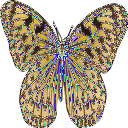

In [9]:
to_pil_image(sample_image)

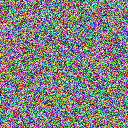

In [10]:
to_pil_image(noise)

In [11]:
model = UNet(in_dim=64,
             dim_mults = (1, 2, 4, 8, 16),
             is_attn = (False, False, False, True, True)
             )
diffusion = DiffusionModel(model = model,
                      num_timesteps=1_000)


In [12]:
diffusion.to(torch.device("cuda:0"))

DiffusionModel(
  (model): UNet(
    (init_conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (time_emb): TimeEmbedding(
      (ln1): Linear(in_features=64, out_features=256, bias=True)
      (act1): GELU()
      (ln2): Linear(in_features=256, out_features=256, bias=True)
    )
    (downs): ModuleList(
      (0): DownBlock(
        (convres): ConvResBlock(
          (norm1): GroupNorm(8, 64, eps=1e-05, affine=True)
          (act1): GELU()
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm2): GroupNorm(8, 64, eps=1e-05, affine=True)
          (act2): GELU()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (res): Identity()
          (time_ln): Linear(in_features=256, out_features=64, bias=True)
          (time_act): GELU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (attn): Identity()
      )
      (1): DownBlock(
        (convres): ConvResBl

In [13]:
diffusion.load_state_dict(torch.load("best_model_but.pt"))

<All keys matched successfully>

In [14]:
x = diffusion.sample(9,3,128)

1000it [00:43, 23.02it/s]


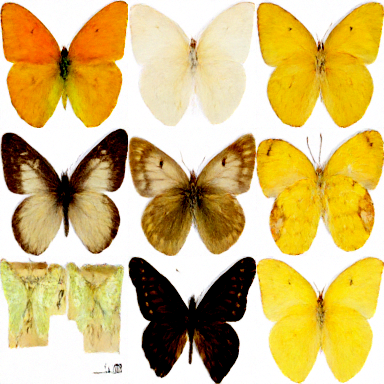

In [15]:
make_grid(x, 3, 3)

In [16]:
diffusion.load_state_dict(torch.load("best_model_celeb.pt"))

<All keys matched successfully>

In [17]:
x = diffusion.sample(9,3,128)

1000it [00:42, 23.27it/s]


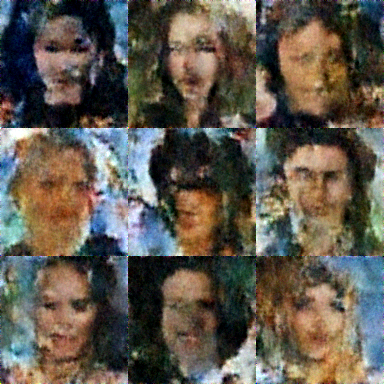

In [18]:
make_grid(x, 3, 3)

In [44]:
x.min()

tensor(-0.0281, device='cuda:0')

In [45]:
x.max()

tensor(1.5730, device='cuda:0')

In [24]:
ddpm.loss(next(enumerate(train_dataloader))[1]['img_input'].to(torch.device("cuda:3")))

tensor(1.1451, device='cuda:3', grad_fn=<MseLossBackward>)

In [29]:
ddpm_.to(torch.device("cuda:3"))
ddpm_(next(enumerate(train_dataloader))[1]['img_input'].to(torch.device("cuda:3")))

tensor(1.1160, device='cuda:3', grad_fn=<MeanBackward0>)

In [60]:
from PIL import Image

In [62]:
image = Image.open("sample/sample_4118.png") 

In [86]:
import numpy

img_np = numpy.asarray(image)/255
img_np = (img_np + 1)/2

In [90]:
dataset = load_dataset("tglcourse/CelebA-faces-cropped-128")

Using custom data configuration tglcourse--CelebA-faces-cropped-128-ed0ded0b73c1d2f9
Found cached dataset parquet (/home1/irteam/.cache/huggingface/datasets/tglcourse___parquet/tglcourse--CelebA-faces-cropped-128-ed0ded0b73c1d2f9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

In [103]:
train_dataset = dataset['train']
train_dataset.set_transform(transform)
train_dataloader = DataLoader(train_dataset, batch_size=16)

In [104]:
sample_image = train_dataset[0]['img_input']

In [105]:
sample_image.min()

tensor(-1.)

In [100]:
sample_image.max()

tensor(0.9922)

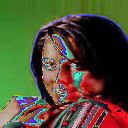

In [106]:
to_pil_image(sample_image)

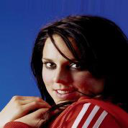

In [101]:
to_pil_image(sample_image)

In [ ]:
ddpm.load_